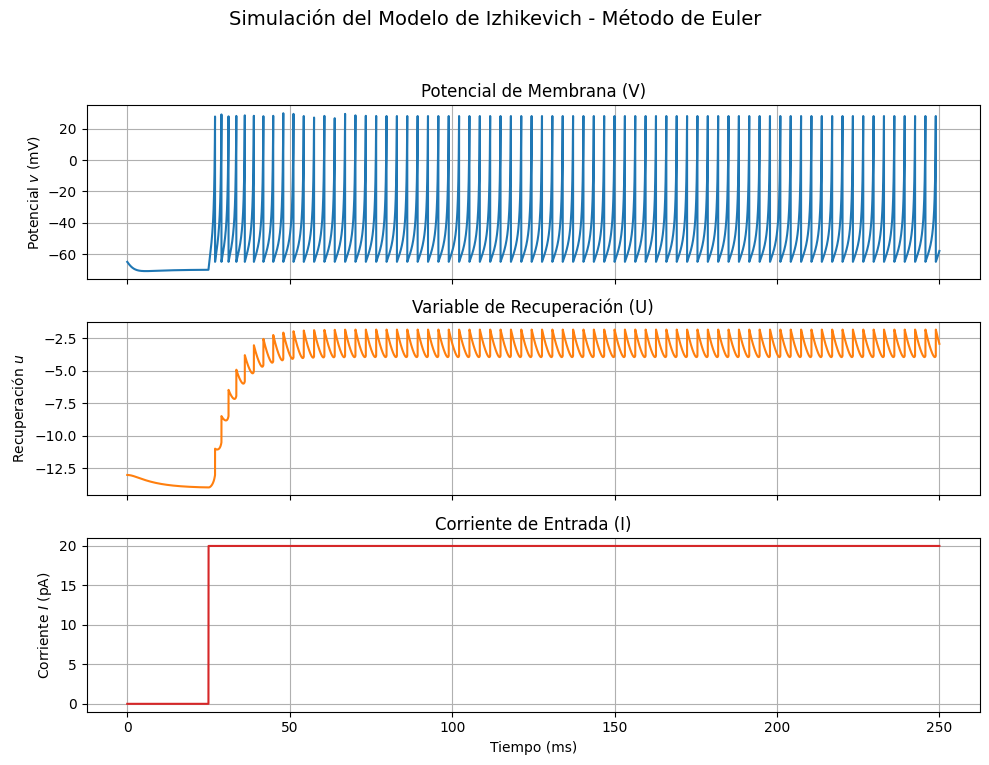

Simulación completa. Se han generado tres gráficos apilados.


In [9]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 24 18:45:39 2025

@author: Tristán Osán
"""

import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros de la neurona Regular Spiking (RS) ---
#a = 0.02
#b = 0.2
#c = -65.0 # (mV)
#d = 8.0

# --- Parámetros de la neurona Fast Spiking (FS) ---
a = 0.1
b = 0.2
c = -65.0 # (mV)
d = 2.0

# --- Parámetros de la neurona "chattering" (CH) ---
#a = 0.02
#b = 0.2
#c = -50.0 # (mV)
#d = 2.0

g0 = 140
g1 = 5
g2 = 0.04

Iini = 0 # amplitud inicial de corriente I para 0 <= t <= tIfin
Ifin = 20 # amplitud final de la corriente I
tIfin = 25 # tiempo para establecer Ifin

# --- Condiciones iniciales y configuración de la simulación ---
v = -65.0  # Potencial de membrana inicial en mV
u = b * v  # Variable de recuperación inicial
vfire = 30 # umbral de disparo del potencial v de membrana (mV)

# Parámetros de la simulación
dt = 0.01   # Paso de tiempo en ms
T = 250   # Duración de la simulación en ms
num_steps = int(T / dt)

# Almacenar el historial de los valores
v_history = np.zeros(num_steps)
u_history = np.zeros(num_steps)
I_history = np.zeros(num_steps)
t_history = np.zeros(num_steps)

# --- Bucle principal de la simulación con el método de Euler ---
for i in range(num_steps):
    current_time = i * dt

    # Aplicar la corriente de entrada escalonada (I vs t)
    if current_time < tIfin:
        I = Iini
    else:
        I = Ifin

    # MÉTODO DE INTEGRACIÓN DE EULER

    # Actualizar las ecuaciones del modelo
    # dv/dt = g2*v^2 + g1*v + g0 - u + I
    dv = g2 * v**2 + g1*v + g0 - u + I

    # du/dt = a * (b*v - u)
    du = a * (b * v - u)

    # Integración
    v += dt * dv
    u += dt * du

    # Condición de reinicio post-espiga (si v >= 30 mV)
    if v >= vfire:
        v = c
        u = u + d

    # Almacenar los resultados para la gráfica
    v_history[i] = v
    u_history[i] = u
    I_history[i] = I
    t_history[i] = current_time

# --- Visualización de los resultados usando Subplots ---
# Crear una figura con 3 subgráficos (3 filas, 1 columna)
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
#fig.suptitle('Simulación del Modelo de Izhikevich (Neurona RS) - Método de Euler', fontsize=14)
fig.suptitle('Simulación del Modelo de Izhikevich - Método de Euler', fontsize=14)

# Gráfico 1: Potencial de Membrana (v versus t)
axs[0].plot(t_history, v_history, color='tab:blue')
axs[0].set_ylabel('Potencial $v$ (mV)')
axs[0].grid(True)
axs[0].set_title('Potencial de Membrana (V)')

# Gráfico 2: Variable de Recuperación (u versus t)
axs[1].plot(t_history, u_history, color='tab:orange')
axs[1].set_ylabel('Recuperación $u$')
axs[1].grid(True)
axs[1].set_title('Variable de Recuperación (U)')

# Gráfico 3: Corriente de Entrada (I versus t)
axs[2].plot(t_history, I_history, color='tab:red')
axs[2].set_ylabel('Corriente $I$ (pA)')
axs[2].set_xlabel('Tiempo (ms)')
axs[2].grid(True)
axs[2].set_title('Corriente de Entrada (I)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar el diseño para dar espacio al título superior
plt.show()

print("Simulación completa. Se han generado tres gráficos apilados.")
